In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential


In [3]:
a,b,c,d = 1,1,1,1
NN = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])
T = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

In [4]:
trainable_vars1 = NN.trainable_variables
trainable_vars2 = T.trainable_variables
g = lambda x : np.cos(x)
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)

In [5]:
def shared_loss(t,NN,T,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(t)
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = T(t) *( tf.square(ode_loss) + tf.square(iv_loss) )

    total_loss = tf.reduce_mean(square_loss)
    return total_loss

competitive 

In [6]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)

epochs = 300
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss1 = shared_loss(train_t,NN,T,g)
        loss2 =  -loss1
    grad = tape.gradient(loss1, trainable_vars1)
    optimizer.apply_gradients(zip(grad, trainable_vars1))
    #discriminator
    grad = tape.gradient(loss2, trainable_vars2)
    optimizer.apply_gradients(zip(grad, trainable_vars2))
    
    train_loss_record1.append(loss1)


In [7]:
y_pred = NN.predict(train_t)
z_pred = T.predict(train_t)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 88ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow te

In [8]:
class C_GradientDescent(tf.Module):

  def __init__(self, learning_rate=1e-3):
    # Initialize parameters
    self.learning_rate = learning_rate
    self.title = f"Gradient descent optimizer: learning rate={self.learning_rate}"

  def apply_gradients(self, grads,hess, vars):
    # Update variables
    for grad,hess, var in zip(grads,hess, vars):
      print(type(var))
      print(type(hess))
      print(type(grads))
      var.assign_sub(self.learning_rate*grad + self.learning_rate**2  * (hess * grad))
# dy_dx = gg.gradient(y, x)

In [9]:
k = 2
var1 = NN.trainable_variables[k]
var2 = T.trainable_variables[k]

with tf.GradientTape(persistent=True) as tape2: 
    with tf.GradientTape(persistent=True) as tape1: 
        loss1 = shared_loss(train_t,NN,T,g)
    grad = tape1.gradient(loss1, var1)
Dxy = tape2.jacobian(grad,var2)

with tf.GradientTape(persistent=True) as tape4: 
    with tf.GradientTape(persistent=True) as tape3: 
        loss2 = -shared_loss(train_t,NN,T,g)
    grad2 = tape3.gradient(loss2, var2)
Dyx = tape4.jacobian(grad2,var1)


    # grad2 = tape.gradient(loss2, trainable_vars2)
    # Dyx = tape.gradient(grad2,trainable_vars1)

# optimizer.apply_gradients(zip(grad, trainable_vars2))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [10]:
tf.linalg.matvec(Dxy, grad)

<tf.Tensor: shape=(32, 32, 32), dtype=float32, numpy=
array([[[ 1.48003528e-06, -6.74346893e-07, -4.35832362e-06, ...,
         -6.87902457e-07,  1.78457105e-06,  2.73893420e-06],
        [ 1.97296984e-07, -1.56123306e-07, -5.85506882e-07, ...,
         -5.72679184e-08,  3.09878601e-07,  3.34831299e-07],
        [-2.23069492e-08,  4.16340612e-07,  7.23300673e-08, ...,
         -2.01396261e-07, -4.67658111e-07,  1.58435626e-07],
        ...,
        [ 1.57482187e-08, -2.02076308e-07, -9.41862766e-08, ...,
          9.30471558e-08,  2.32027929e-07, -3.69569264e-08],
        [-2.19159210e-06,  5.30763941e-07,  4.65573885e-06, ...,
          1.21259893e-06, -2.07354810e-06, -3.09521783e-06],
        [-6.44952343e-06, -4.09700306e-07,  1.82010644e-05, ...,
          4.72277225e-06, -4.11779592e-06, -1.30913304e-05]],

       [[-4.84378745e-07,  5.57237627e-07,  1.74960667e-06, ...,
          5.85318389e-08, -9.60098532e-07, -9.42032329e-07],
        [-5.31573789e-08,  1.24472280e-07,  2.083

In [11]:
def contains1(var):
    for i in var.shape:
        if i == 1:
            return False

In [13]:
# n_params = np.max(var1.shape)

# grad = tf.reshape(grad, [n_params, 1])
# grad2 = tf.reshape(grad2, [n_params, 1])
# Dxy = tf.reshape(Dxy, [n_params, n_params])
# Dyx = tf.reshape(Dxy, [n_params, n_params])


In [ ]:
mu = 10e-2
dim = tf.squeeze(var1).shape.__len__()


In [ ]:
for k in range(0,32):
    grad_k = tf.reshape(grad[k], [n_params, 1])
    Dxy[0][k] @ grad_k

In [ ]:
#NN.trainable_variables

In [ ]:
 tf.tensordot(Dxy,grad2,dim)

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[0.00022872]]]], dtype=float32)>

In [ ]:
M2  = grad - mu *  tf.linalg.matvec(Dxy,grad2,dim)

In [ ]:
M1 = tf.linalg.inv(tf.eye(32) - mu**2 *  tf.tensordot(Dxy,Dyx,dim))
M2  = grad - mu *  tf.linalg.matvec(Dxy,grad2,dim)



KeyboardInterrupt



SGD

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'v1'

In [ ]:

optimizer = tf.optimizers.SGD(learning_rate=0.01)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
train_loss_record1 = []
epochs = 300
for k in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss1 = shared_loss(train_t,NN,T,g)
        loss2 =  -loss1
    grad = tape.gradient(loss1, trainable_vars1)
    optimizer.apply_gradients(zip(grad, trainable_vars1))
    #discriminator
    grad = tape.gradient(loss2, trainable_vars2)
    optimizer.apply_gradients(zip(grad, trainable_vars2))
    
    train_loss_record1.append(loss1)
    # print("k : ", k)
    # print(shared_loss(train_t,NN,T,g))'

In [ ]:
train_loss_record1

[<tf.Tensor: shape=(), dtype=float32, numpy=0.05258881>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.117624976>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.16457541>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.18817239>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1917912>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.18365759>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.17178226>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.16123372>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.15407896>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.15049456>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14983782>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.15129046>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.15414008>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.15785652>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.16207987>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.166581>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.17122142>,
 <tf.Tensor: shape=(), dtype=floa

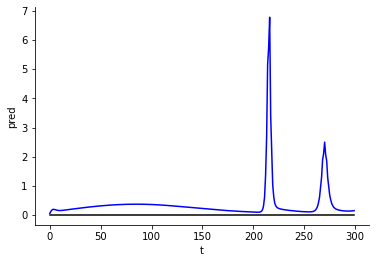

In [ ]:
fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_loss_record1,"b")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.plot([0 for k in range(300)],"black")

SGDA

In [ ]:
- gradxf - mu * Dxyf * gradyf

In [ ]:
1e-03

0.001

In [28]:
with tf.GradientTape(persistent=True) as tape0: 
    with tf.GradientTape(persistent=True) as tape1: 
        loss2 = -shared_loss(train_t,NN,T,g)
    grad1 = tape1.gradient(loss2, var2)
Dyx = tape0.jacobian(grad1,var1)

    
    
with tf.GradientTape(persistent=True) as tape4: 
    with tf.GradientTape(persistent=True) as tape3: 
        loss2 = shared_loss(train_t,NN,T,g)
    with tf.GradientTape(persistent=True) as tape5: 
        loss3 = shared_loss(train_t,NN,T,g)
    grad2 = tape3.gradient(loss2, var1)
    grad3 = tape5.gradient(loss3, var2)
    
    
Dxy_gradyf = tape2.gradient(grad,var2,output_gradients = grad1) #Hesse Vektor produkt
# für Hesse*Hesse produkt spaltenweise Hess*gradient produkt

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [35]:
# for k in Dxy:
#     print(k.shape)
# grad1

In [68]:
def SGA_iteration(mu = 1e-03):
    for k in range(0,T.trainable_variables.__len__()):
        # k = 4
        
        
        var1 = NN.trainable_variables[k]
        var2 = T.trainable_variables[k]

        with tf.GradientTape(persistent=True) as tape2: 
            
            with tf.GradientTape(persistent=True) as tape1: 
                loss = shared_loss(train_t,NN,T,g)
            with tf.GradientTape(persistent=True) as tape0: 
                loss1 = shared_loss(train_t,NN,T,g)
            grad = tape1.gradient(loss, var1)
            grad1 = tape0.gradient(loss1, var2)
            
            
        with tf.GradientTape(persistent=True) as tape4: 
            with tf.GradientTape(persistent=True) as tape3: 
                loss2 = shared_loss(train_t,NN,T,g)
            with tf.GradientTape(persistent=True) as tape5: 
                loss3 = shared_loss(train_t,NN,T,g)
            grad2 = tape3.gradient(loss2, var1)
            grad3 = tape5.gradient(loss3, var2)
            
            
        Dxy_gradyf = tape2.gradient(grad,var2,output_gradients = grad1) #Hesse Vektor produkt
        # tf.print(Dxx_gradxf)

        Dyx_gradxg = tape4.gradient(grad2,var1,output_gradients = grad2) #Hesse Vektor produkt
        
        var1.assign_sub(-mu * grad - mu *  Dxy_gradyf )
        var2.assign_sub(-mu * grad2 - mu *  Dyx_gradxg )

In [69]:
epochs = 5
train_loss_record1 = []
for k in range(epochs):
    SGA_iteration()
    print("k : ", k)
    print(shared_loss(train_t,NN,T,g))
    # train_loss_record1.append(shared_loss(train_t,NN,T,g))

k :  0
tf.Tensor(5.979331, shape=(), dtype=float32)
k :  1
tf.Tensor(-1.8480353, shape=(), dtype=float32)
k :  2
tf.Tensor(-1.577327, shape=(), dtype=float32)
k :  3
tf.Tensor(3.9786193, shape=(), dtype=float32)
k :  4
tf.Tensor(-381671830000000.0, shape=(), dtype=float32)


In [12]:
train_loss_record1

[<tf.Tensor: shape=(), dtype=float32, numpy=7.6302238>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.896523e+19>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>]

OGDA

https://stackoverflow.com/questions/76093944/vjp-and-jvp-in-tensorflow

In [16]:
k = 2
var1 = NN.trainable_variables[k]
var2 = T.trainable_variables[k]

with tf.GradientTape(persistent=True) as tape2: 
    with tf.GradientTape(persistent=True) as tape1: 
        loss1 = shared_loss(train_t,NN,T,g)
    grad = tape1.gradient(loss1, var1)
Dxy_gradf = tape2.gradient(grad,var2,output_gradients = grad2)
Dxx_gradf = tape2.gradient(grad,var1,output_gradients = grad)

with tf.GradientTape(persistent=True) as tape4: 
    with tf.GradientTape(persistent=True) as tape3: 
        loss2 = -shared_loss(train_t,NN,T,g)
    grad2 = tape3.gradient(loss2, var2)
    
# Dyx = tape4.jacobian(grad2,var1)
A_v = tape4.gradient(grad2,var1,output_gradients = grad2)

var1 = grad - mu *  Dxy_gradf  + mu * tf.linalg.matvec(Dxy,grad)


    # grad2 = tape.gradient(loss2, trainable_vars2)
    # Dyx = tape.gradient(grad2,trainable_vars1)

# optimizer.apply_gradients(zip(grad, trainable_vars2))

NameError: name 'grad2' is not defined

In [1]:
def OGDA_iteration(mu = 1e-03):
    for k in range(0,T.trainable_variables.__len__()):
        # k = 4
        
        
        var1 = NN.trainable_variables[k]
        var2 = T.trainable_variables[k]

        with tf.GradientTape(persistent=True) as tape2: 
            
            with tf.GradientTape(persistent=True) as tape1: 
                loss1 = shared_loss(train_t,NN,T,g)
            with tf.GradientTape(persistent=True) as tape0: 
                loss = shared_loss(train_t,NN,T,g)
            grad = tape1.gradient(loss1, var1)
            grad0 = tape0.gradient(loss, var2)
            
            
        with tf.GradientTape(persistent=True) as tape4: 
            with tf.GradientTape(persistent=True) as tape3: 
                loss2 = -shared_loss(train_t,NN,T,g)
            with tf.GradientTape(persistent=True) as tape5: 
                loss3 = -shared_loss(train_t,NN,T,g)
            grad2 = tape3.gradient(loss2, var2)
            grad3 = tape5.gradient(loss3, var1)
            
        Dxy_gradyf = tape2.gradient(grad,var2,output_gradients = grad0) #Hesse Vektor produkt
        # tf.print(Dxx_gradxf)
        Dxx_gradxf = tape2.gradient(grad,var1,output_gradients = grad) # HEsse Vektor Product#noch zu überprüfen

        # Dyy_gradyg = tape4.gradient(grad2,var2,output_gradients = grad2) # HEsse Vektor Product#noch zu überprüfen

        Dyx_gradxg = tape4.gradient(grad2,var1,output_gradients = grad3) #Hesse Vektor produkt
        
        print
        #berechne Dyy_gradyg mit forward 
        with tf.GradientTape() as grad_tape:
            with  tf.autodiff.ForwardAccumulator (
                var2, grad2) as acc:
                loss = -shared_loss(train_t,NN,T,g)
        Dyy_gradyg = grad_tape.gradient(acc.jvp(loss), var2)
        # tf.print(Dyy_gradyg)
        # tf.print(var2)


            # Dyxg_gradg = tape4.gradient(grad2,var1,output_gradients = grad2)
            # Dyy_gradxg = tape4

            # var1 = grad - mu *  Dxy_gradf  + mu * Dxx_gradf
            # var2 = grad2 - mu * D
            #versuche es mit forward acc
        var1.assign_sub(-grad - mu *  Dxy_gradyf  + mu * Dxx_gradxf)
        var2.assign_sub(-grad2 - mu *  Dyx_gradxg  + mu * Dyy_gradyg)

In [15]:
SGA_iteration()

training loop sgda

In [22]:
epochs = 5
train_loss_record1 = []
for k in range(epochs):
    SGA_iteration()
    print("k : ", k)
    train_loss_record1.append(shared_loss(train_t,NN,T,g))

k :  0
k :  1
k :  2
k :  3
k :  4


In [23]:
train_loss_record1

[<tf.Tensor: shape=(), dtype=float32, numpy=14752.608>,
 <tf.Tensor: shape=(), dtype=float32, numpy=inf>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [ ]:
#forward

with tf.autodiff.ForwardAccumulator (
    var2, grad2) as acc:
    with tf.GradientTape() as grad_tape:
        loss = shared_loss(train_t,NN,T,g)
grad1 = grad_tape.gradient(loss, var2)
Dyy = acc.jvp(grad1)
grad1


In [81]:
with tf.GradientTape() as grad_tape:
# grad_tape.watch(h1.trainable_variables)
    # loss = -shared_loss(train_t,NN,T,g)
    with  tf.autodiff.ForwardAccumulator (
        var2, grad2) as acc:
        loss = -shared_loss(train_t,NN,T,g)

U = grad_tape.gradient(acc.jvp(loss), var2)
#forward wirft keinen None

In [79]:
var2 = T.trainable_variables[5]
with tf.GradientTape(persistent=True) as tape4: 
    tape4.watch(var2)
    with tf.GradientTape(persistent=True) as tape3: 
        loss = -shared_loss(train_t,NN,T,g)
    grad2 = tape3.gradient(loss, var2)
# print(type(grad2))
Z = tape4.gradient(grad2,var2,output_gradients = grad2)

In [82]:
U

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [78]:
U - Z

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -1.4901161e-08,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.4901161e-08,
       -5.8207661e-11,  0.0000000e+00, -1.4901161e-08,  0.0000000e+00,
       -1.1641532e-10, -1.4901161e-08, -3.7252903e-09,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  3.7252903e-09,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        1.8626451e-09,  0.0000000e+00,  0.0000000e+00, -7.4505806e-09],
      dtype=float32)>

In [12]:
def g(t):
    return np.cos(t)

In [39]:
var2 = NN.trainable_variables[3]
with tf.GradientTape(persistent=True) as tape4: 
    with tf.GradientTape(persistent=True) as tape3: 
        loss = -shared_loss(train_t,NN,T,g)
    grad2 = tape3.gradient(loss, var2)
print(type(grad2))
tf.print(tape4.gradient(grad2,var2))
  

<class 'tensorflow.python.framework.ops.EagerTensor'>
[-0.198037535 0.149052531 0.0767920911 ... 0.00750894845 0.0101512596 -0.00354607403]


setze es zu null?

In [ ]:
var1.assign_sub(grad - mu *  Dxy_gradyf  + mu * Dxx_gradxf)
var2.assign_sub(grad - mu *  Dyx_gradxg  + mu * Dyy_gradyg)

<tf.Tensor: shape=(32, 32), dtype=float32, numpy=
array([[-4.6110000e-07,  3.7966242e-05, -4.1607189e-05, ...,
         2.6117861e-05,  1.8781768e-05, -2.6791133e-05],
       [ 1.8468677e-07, -1.7177117e-05,  1.8871104e-05, ...,
        -1.1814228e-05, -8.4978428e-06,  1.2170377e-05],
       [ 1.7577227e-06, -8.4219442e-05,  9.0861446e-05, ...,
        -5.8007514e-05, -4.1651398e-05,  5.7917787e-05],
       ...,
       [ 8.2121375e-07, -5.6645764e-05,  6.1817969e-05, ...,
        -3.8980816e-05, -2.8020357e-05,  3.9698290e-05],
       [ 1.1281536e-08, -1.0837645e-06,  1.1913679e-06, ...,
        -7.4536513e-07, -5.3616446e-07,  7.6863489e-07],
       [-9.2735581e-07,  6.0929073e-05, -6.6406414e-05, ...,
         4.1932632e-05,  3.0138432e-05, -4.2609481e-05]], dtype=float32)>

In [ ]:
var1.assign_sub(grad - mu *  Dxy_gradyf  + mu * Dxx_gradxf)
var2.assign_sub(grad - mu *  Dyx_gradxg  + mu * Dyy_gradyg)

<tf.Variable 'UnreadVariable' shape=(32,) dtype=float32, numpy=
array([-0.01087814, -0.00333859,  0.00283779,  0.00824017, -0.00798694,
        0.00863228, -0.01211496,  0.01969597,  0.00918963,  0.00796708,
       -0.00209234, -0.00804568,  0.01245896,  0.00431448,  0.00535099,
        0.01060803,  0.01284291, -0.01190958, -0.0016384 , -0.00893993,
       -0.01216437, -0.02015602, -0.00454608, -0.00563179, -0.01800698,
        0.00070412, -0.00197394, -0.0015933 , -0.00205856,  0.00761206,
        0.02295514,  0.00234789], dtype=float32)>

In [ ]:
  with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
      logits = h1(images, training=True)
      loss = tf.compat.v1.losses.softmax_cross_entropy(
          logits=logits, onehot_labels=labels)
    grads = inner_tape.gradient(loss, h1.trainable_variables)
  return outer_tape.gradient(
      grads, h1.trainable_variables, output_gradients=vector)

In [ ]:
with tf.GradientTape(persistent=True) as tape: 
    grads = tape.gradient(grad,var2,output_gradients = grad)

In [ ]:
grads

In [ ]:
grad - mu *  tf.linalg.matvec(Dxy,grad2) + mu * tf.linalg.matvec(Dxy,grad)

In [ ]:
tf.linalg.tensordot(Dxy,grad,2)

<tf.Tensor: shape=(32, 32), dtype=float32, numpy=
array([[ 3.1644796e-04, -2.6273359e-05,  1.4123552e-04, ...,
         5.2533165e-04, -8.4452091e-05, -2.9865134e-04],
       [ 8.7899028e-04, -7.0649476e-05,  3.8539164e-04, ...,
         1.4516520e-03, -2.3058898e-04, -8.3000376e-04],
       [-8.9740520e-04,  7.2051494e-05, -3.9285363e-04, ...,
        -1.4815319e-03,  2.3510943e-04,  8.4739702e-04],
       ...,
       [-5.9449417e-04,  4.8763224e-05, -2.6404811e-04, ...,
        -9.8534022e-04,  1.5786031e-04,  5.6118850e-04],
       [ 6.0653838e-04, -4.9715196e-05,  2.6931131e-04, ...,
         1.0052011e-03, -1.6100633e-04, -5.7256542e-04],
       [-1.0105843e-03,  8.2312232e-05, -4.3471943e-04, ...,
        -1.6639642e-03,  2.6158770e-04,  9.5373206e-04]], dtype=float32)>

In [ ]:
@tf.function
def jacobian_transpose_vec(ys, xs, vs):
  dydxs = tf.gradients(ys, xs, grad_ys=vs, stop_gradients=xs)
  dydxs = [
      tf.zeros_like(x) if dydx is None else dydx for x, dydx in zip(xs, dydxs)
  ]
  return dydxs

fall n = 1

In [ ]:
M1 = 1/(1 - mu**2 *  Dxy[0] * Dyx[0])
M1

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.0000044], dtype=float32)>

In [ ]:
M2

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[0.01608469]]]], dtype=float32)>

In [ ]:
M1 = 1/(1 - mu**2 *  Dxy[0] * Dyx[0])
M2  = grad[0] - mu *  Dxy[0] * grad[0]
var1.assign_sub(mu*M1 * M2)

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([0.06397489], dtype=float32)>

In [ ]:
var1.shape == [1]

True

sgda git

In [35]:
#@title Defining the SGA Optimiser
def jacobian_transpose_vec(ys, xs, vs):
  dydxs = tf.gradients(ys, xs, grad_ys=vs, stop_gradients=xs)
  dydxs = [
      tf.zeros_like(x) if dydx is None else dydx for x, dydx in zip(xs, dydxs)
  ]
  return dydxs
def list_divide_scalar(xs, y):
  return [x / y for x in xs]


def list_subtract(xs, ys):
  return [x - y for (x, y) in zip(xs, ys)]


#
# def jacobian_vec(ys, xs, vs):
#   return kfac.utils.fwd_gradients(
#       ys, xs, grad_xs=vs, stop_gradients=xs)



#
def jacobian_vec(ys, xs, vs):
  return tf.autodiff.ForwardAccumulator(
      ys, xs, grad_xs=vs, stop_gradients=xs)


def _dot(x, y):
  dot_list = []
  for xx, yy in zip(x, y):
    dot_list.append(tf.reduce_sum(xx * yy))
  return tf.add_n(dot_list)


class SymplecticOptimizer(tf.train.Optimizer):
  """Optimizer that corrects for rotational components in gradients."""

  def __init__(self,
               learning_rate,
               reg_params=1.,
               use_signs=True,
               use_locking=False,
               name='symplectic_optimizer'):
    super(SymplecticOptimizer, self).__init__(
        use_locking=use_locking, name=name)
    self._gd = tf.train.RMSPropOptimizer(learning_rate)
    self._reg_params = reg_params
    self._use_signs = use_signs

  def compute_gradients(self,
                        loss,
                        var_list=None,
                        gate_gradients=tf.train.Optimizer.GATE_OP,
                        aggregation_method=None,
                        colocate_gradients_with_ops=False,
                        grad_loss=None):
    return self._gd.compute_gradients(loss, var_list, gate_gradients,
                                      aggregation_method,
                                      colocate_gradients_with_ops, grad_loss)

  def apply_gradients(self, grads_and_vars, global_step=None, name=None):
    grads, vars_ = zip(*grads_and_vars)
    n = len(vars_)
    h_v = jacobian_vec(grads, vars_, grads)
    ht_v = jacobian_transpose_vec(grads, vars_, grads)
    at_v = list_divide_scalar(list_subtract(ht_v, h_v), 2.)
    if self._use_signs:
      grad_dot_h = _dot(grads, ht_v)
      at_v_dot_h = _dot(at_v, ht_v)
      mult = grad_dot_h * at_v_dot_h
      lambda_ = tf.sign(mult / n + 0.1) * self._reg_params
    else:
      lambda_ = self._reg_params
    apply_vec = [(g + lambda_ * ag, x)
                 for (g, ag, x) in zip(grads, at_v, vars_)
                 if at_v is not None]
    return self._gd.apply_gradients(apply_vec, global_step, name)


AttributeError: module 'tensorflow._api.v2.train' has no attribute 'Optimizer'

In [ ]:

# tf.tensordot(Dxy,grad2,tf.squeeze(var1).shape.__len__())
def calculate_gradients(var1,var2):
    # print(T.trainable_variables[k].shape)
    with tf.GradientTape(persistent=True) as tape2: 
        with tf.GradientTape(persistent=True) as tape1: 
            loss1 = shared_loss(train_t,NN,T,g)
        grad = tape1.gradient(loss1, var1)
    Dxy = tape2.jacobian(grad,var2)

    with tf.GradientTape(persistent=True) as tape4: 
        with tf.GradientTape(persistent=True) as tape3: 
            loss2 = -shared_loss(train_t,NN,T,g)
        grad2 = tape3.gradient(loss2, var2)
    Dyx = tape4.jacobian(grad2,var1)
    return Dyx,Dxy,grad,grad2
    
def apply_gradients(Dyx,Dxy,grad,grad2):
    if contains1(var1):
        # Dxy = tf.squeeze(Dxy)
        n_params = np.max(var1.shape)
        Identity = tf.eye(n_params)
        grad = tf.reshape(grad, [n_params, 1])
        grad2 = tf.reshape(grad2, [n_params, 1])
        Dxy = tf.reshape(Dxy, [n_params, n_params])
        Dyx = tf.reshape(Dyx, [n_params, n_params])
    else:
        try:
            Identity = tf.eye(var1.shape)
        except Exception:
            Identity =  tf.eye(var1.shape[0])
        
    M1 = tf.linalg.inv(tf.eye(32) - mu**2 *  tf.tensordot(Dxy,Dyx,dim)) #32 ist statisch
    M2  = grad - mu *  tf.tensordot(Dxy,grad2,dim)
    
    # M1 = tf.linalg.inv(Identity - mu**2 * Dxy @ Dyx)
    # M2  = grad_f - mu * h_xy @ grad_g
    # print(M1@M2.shape)
    U = tf.reshape(tf.tensordot(M1,M2,dim),var1.shape)
    var1.assign_sub(mu*U)
def contains1(var):
    for i in var.shape:
        if i == 1:
            return True
    return False

# for k in range(0,T.trainable_variables.__len__()):
#     var1 = NN.trainable_variables[k]
#     var2 = T.trainable_variables[k]
#     shape = tf.squeeze(var1).shape
#     dim = tf.squeeze(var1).shape.__len__()


        

        
#     if var1.shape == [1]:
#         Dyx,Dxy,grad,grad2 = calculate_gradients(var1,var2)
#         M1 = 1/(1 - mu**2 *  Dxy[0] * Dyx[0])
#         M2  = grad[0] - mu *  Dxy[0] * grad[0]
#         var1.assign_sub(mu*M1 * M2)
        
#         Dyx,Dxy,grad,grad2 = calculate_gradients(var2,var1)
#         M1 = 1/(1 - mu**2 *  Dxy[0] * Dyx[0])
#         M2  = grad[0] - mu *  Dxy[0] * grad[0]
#         var1.assign_sub(mu*M1 * M2)
#         continue
        
#     apply_gradients(*calculate_gradients(var1,var2))
#     apply_gradients(*calculate_gradients(var2,var1))
        
    #mu?


training loop

In [ ]:
epochs = 100
for k in range(epochs): 
    print(k)
    for k in range(0,T.trainable_variables.__len__()):
        
        var1 = NN.trainable_variables[k]
        var2 = T.trainable_variables[k]
        shape = tf.squeeze(var1).shape
        dim = tf.squeeze(var1).shape.__len__()


            

            
        if var1.shape == [1]:
            Dyx,Dxy,grad,grad2 = calculate_gradients(var1,var2)
            M1 = 1/(1 - mu**2 *  Dxy[0] * Dyx[0])
            M2  = grad[0] - mu *  Dxy[0] * grad[0]
            var1.assign_sub(mu*M1 * M2)
            
            Dyx,Dxy,grad,grad2 = calculate_gradients(var2,var1)
            M1 = 1/(1 - mu**2 *  Dxy[0] * Dyx[0])
            M2  = grad[0] - mu *  Dxy[0] * grad[0]
            var1.assign_sub(mu*M1 * M2)
            continue
            
        apply_gradients(*calculate_gradients(var1,var2))
        apply_gradients(*calculate_gradients(var2,var1))
        loss1 = shared_loss(train_t,NN,T,g)
        train_loss_record1.append(loss1)

training_loop?

plot

In [89]:
from tensorflow.python.ops import math_ops

t = np.linspace(0,1,10**2)
t = t.reshape((t.shape[0],1))

def trapezoid(t, y):
    return math_ops.reduce_sum(
            math_ops.multiply( t[1:] - t[:-1],
                              (y[:-1] + y[1:]) / 2.))
            #  name='trapezoidal_integral_approx')
np.sqrt ( trapezoid(t,(NN(t) - np.sin(t))**2) )

0.23089646

In [ ]:
#neu rechnen!

cgd konvergiert nicht wir versuchen sgd

https://github.com/google-deepmind/symplectic-gradient-adjustment/blob/master/Symplectic_Gradient_Adjustment.ipynb

In [107]:
def list_divide_scalar(xs, y):
  return [x / y for x in xs]


def list_subtract(xs, ys):
  return [x - y for (x, y) in zip(xs, ys)]


def jacobian_vec(ys, xs, vs):
  return tf.autodiff.ForwardAccumulator(
      ys, xs, grad_xs=vs, stop_gradients=xs)

def jacobian_transpose_vec(ys, xs, vs):
  dydxs = tf.gradients(ys, xs, grad_ys=vs, stop_gradients=xs)
  dydxs = [
      tf.zeros_like(x) if dydx is None else dydx for x, dydx in zip(xs, dydxs)
  ]
  return dydxs


def   _dot(x, y):
  dot_list = []
  for xx, yy in zip(x, y):
    dot_list.append(tf.reduce_sum(xx * yy))
  return tf.add_n(dot_list)


class SymplecticOptimizer(tf.compat.v1.train.Optimizer):
  """Optimizer that corrects for rotational components in gradients."""

  def __init__(self,
               learning_rate,
               reg_params=1.,
               use_signs=True,
               use_locking=False,
               name='symplectic_optimizer'):
    super(SymplecticOptimizer, self).__init__(
        use_locking=use_locking, name=name)
    self._gd = tf.train.RMSPropOptimizer(learning_rate)
    self._reg_params = reg_params
    self._use_signs = use_signs

  def compute_gradients(self,
                        loss,
                        var_list=None,
                        gate_gradients=tf.compat.v1.train.Optimizer.GATE_OP,
                        aggregation_method=None,
                        colocate_gradients_with_ops=False,
                        grad_loss=None):
    return self._gd.compute_gradients(loss, var_list, gate_gradients,
                                      aggregation_method,
                                      colocate_gradients_with_ops, grad_loss)

  def apply_gradients(self, grads_and_vars, global_step=None, name=None):
    grads, vars_ = zip(*grads_and_vars)
    n = len(vars_)
    h_v = jacobian_vec(grads, vars_, grads)
    ht_v = jacobian_transpose_vec(grads, vars_, grads)
    at_v = list_divide_scalar(list_subtract(ht_v, h_v), 2.)
    if self._use_signs:
      grad_dot_h = _dot(grads, ht_v)
      at_v_dot_h = _dot(at_v, ht_v)
      mult = grad_dot_h * at_v_dot_h
      lambda_ = tf.sign(mult / n + 0.1) * self._reg_params
    else:
      lambda_ = self._reg_params
    apply_vec = [(g + lambda_ * ag, x)
                 for (g, ag, x) in zip(grads, at_v, vars_)
                 if at_v is not None]
    return self._gd.apply_gradients(apply_vec, global_step, name)

In [ ]:
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = shared_loss(train_t,NN,T,g)
        
    grad1 = tape.gradient(loss, trainable_vars1)
    grad2 = tape.gradient(loss, trainable_vars2)
    
    hess_xy = tape.gradient(grad1,trainable_vars2)
    hess_yx = tape.gradient(grad2,trainable_vars1)
    
    
    optimizer.apply_gradients(grad,hess_xy, trainable_vars)
    train_loss_record1.append(loss)

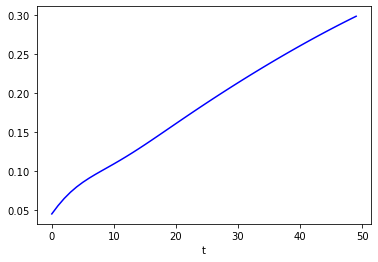

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
axs.set_xlabel("t")
'train_loss_record1'
axs.plot(train_loss_record1[:50],"b")

In [ ]:
y_pred = NN.predict(train_t)


1/1 [==============================] - 0s 77ms/step


In [ ]:
epochs = 5
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = shared_loss(train_t,NN,T,g)
        
    grad1 = tape.gradient(loss, trainable_vars1)
    grad2 = tape.gradient(loss, trainable_vars2)
    
    hess_xy = tape.gradient(grad1,trainable_vars2)
    hess_yx = tape.gradient(grad2,trainable_vars1)
    
    
    optimizer.apply_gradients(grad,hess_xy, trainable_vars)
    train_loss_record1.append(loss)

In [ ]:
for k in var.shape:
    print(k== None)

False


In [ ]:
var1 = NN.trainable_variables[1]

In [ ]:
print(tf.squeeze(var1).shape)

(32,)


In [ ]:
for var in trainable_vars1:
    print(np.max(var.shape))
    

32
32
32
32
32
1


beispiel docs

In [ ]:
x = tf.random.normal([7, 5])
l1 = tf.keras.layers.Dense(8, activation=tf.nn.relu)
l2 = tf.keras.layers.Dense(6, activation=tf.nn.relu)

with tf.GradientTape() as t2:
  with tf.GradientTape() as t1:
    x = l1 (x)
    x = l2 (x)
    loss = tf.reduce_mean(x **2)

  g = t1.gradient(loss, l1.kernel)

h = t2.jacobian(g, l1.kernel)
NN.trainable_variables[0]
with tf.GradientTape(persistent=True) as t2: 
  with tf.GradientTape(persistent=True) as t1: 
      loss1 = shared_loss(train_t,NN,T,g)
  g = t1.gradient(loss1, trainable_vars1)

h = t2.jacobian(g, trainable_vars2)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

In [ ]:
n_params = tf.reduce_prod(layer1.kernel.shape)
n_params
# g_vec = tf.reshape(g, [n_params, 1])
# h_mat = tf.reshape(h, [n_params, n_params])

<tf.Tensor: shape=(), dtype=int32, numpy=40>

In [ ]:
#tf.linalg.inv(  Dyx[0] @ Dxy[0] )

In [ ]:

# fig, axs = plt.subplots(1)
# axs.set_xlabel("t")
# axs.set_ylabel("pred")
# axs.plot(train_loss_record1,"b")
# axs.spines['top'].set_visible(False)
# axs.spines['right'].set_visible(False)

In [ ]:
loss = shared_loss(train_t,NN,T,g)
grad2 = tape.gradient(loss, trainable_vars2)
# hess_yx = tape.gradient(grad2,trainable_vars1)
grad2

[None, None, None, None, None, None]

In [ ]:
class C_GradientDescent(tf.Module):

  def __init__(self, learning_rate=1e-3):
    # Initialize parameters
    self.learning_rate = learning_rate
    self.title = f"Gradient descent optimizer: learning rate={self.learning_rate}"

  def apply_gradients(self, grads,hess, vars):
    # Update variables
    for grad,hess, var in zip(grads,hess, vars):
      print(type(var))
      print(type(hess))
      print(type(grads))
      var.assign_sub(self.learning_rate*grad + self.learning_rate**2  * (hess * grad))
# dy_dx = gg.gradient(y, x)
loss = shared_loss(train_t,NN,T,g)
grad2 = tape.gradient(loss, trainable_vars2)
hess_yx = tape.gradient(grad2,trainable_vars1)

optimizer = C_GradientDescent()


epochs = 5
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = shared_loss(train_t,NN,T,g)
        
    grad1 = tape.gradient(loss, trainable_vars1)
    grad2 = tape.gradient(loss, trainable_vars2)
    
    hess_xy = tape.gradient(grad1,trainable_vars2)
    hess_yx = tape.gradient(grad2,trainable_vars1)
    
    
    optimizer.apply_gradients(grad,hess_xy, trainable_vars)
    train_loss_record1.append(loss)


In [ ]:

for i in range(32):
    for j in range(32):
        
        A = tf.zeros((32,32))
        for k in range(0,32):
            tf.add(Dxy[i][k] @ Dyx[k][j],A)
        # B[i][j] = A

links
https://openreview.net/pdf?id=HJechEHeLr
https://www.tensorflow.org/guide/advanced_autodiff#hessian
https://proceedings.mlr.press/v119/schaefer20a/schaefer20a.pdf
https://f-t-s.github.io/projects/cgd/
https://arxiv.org/pdf/2204.11144.pdf

latex nn
http://chebe163.caltech.edu/2018w/handouts/intro_to_latex.html#:~:text=The%20align%20environment%20in%20Latex,line%20at%20the%20alignment%20point.
https://deeplearningmath.org/general-fully-connected-neural-networks